In [1]:
import pandas as pd

# Assuming the dataset is in a CSV format
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset.csv'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate reviews by sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

# Plot word clouds
plot_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
plot_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')


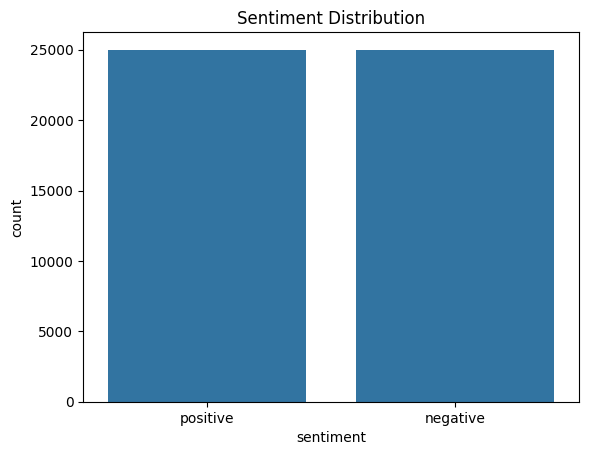

In [ ]:
import seaborn as sns

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


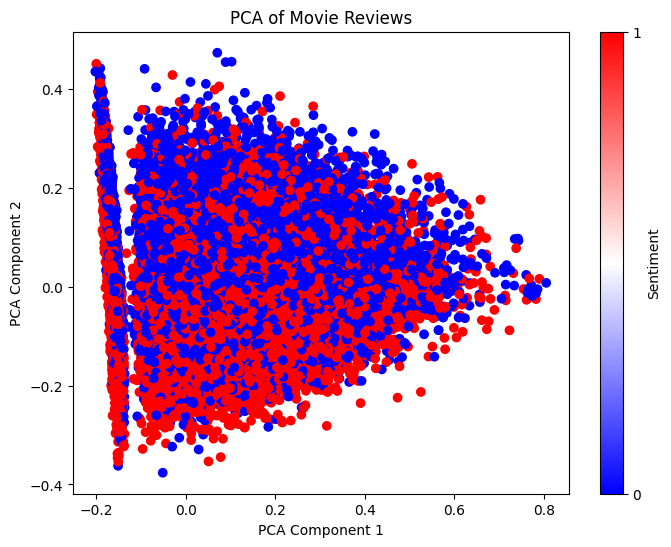

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0), cmap='bwr')
plt.colorbar(scatter, ticks=[0, 1], label='Sentiment')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Movie Reviews')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8667
              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

